## <center> Visualization on OSNACA dataset  </center>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [29]:
%matplotlib inline

In [30]:
#Reading the data
data1 = pd.read_excel('osnaca-data.xlsx')

In [31]:
# Looking the first 6 rows of the dataset
data1.head()

,Sample,Code,Au (FA),Pt,Pd,Au (AR),Bi,Te,Hg,Ag,...,LONG,LAT,Deposit Name,Donor,Three Character Code,Country,State,Class,Sub Class,Your Sample ID
0,700001,NaN,0.438,0.002,0.002,0.362,10.60,0.02,0.39,91.5,...,149.569996,-35.062625,Woodlawn,Carl Brauhart,WLN,Australia,New South Wales,VHMS,NaN,NaN
1,700002,NaN,0.093,0.001,0.002,0.095,125.00,0.22,0.12,44.0,...,149.569996,-35.062625,Woodlawn,Carl Brauhart,WLN,Australia,New South Wales,VHMS,NaN,NaN
2,700003,NaN,1.41,0.002,0.002,1.39,120.00,0.02,62.9,215.0,...,145.515162,-41.841336,Hercules,Carl Brauhart,HER,Australia,Tasmania,VHMS,NaN,NaN
3,700004,1,0.096,0.003,0.005,0.086,0.72,0.80,0.03,2.5,...,-49.177603,-13.975260,Mara Rosa-(Zacarias mine),Steffen Hageman,MRB,Brazil,Goiás,VHMS,NaN,SH-MR4
4,700005,NaN,2.9,0.003,0.005,3.94,0.34,0.06,4.01,162.0,...,116.963014,-28.777512,Gossan Hill,Steffen Hageman,GHL,Australia,Western Australia,VHMS,NaN,SH-GG9


In [32]:
data1['Class'].value_counts()

Orogenic - Intrusion Related Au    332
VHMS                               134
Sediment Hosted Pb-Zn              115
Epithermal                         109
IOCG                                61
Porphyry                            58
Magmatic Ni-Cu-PGE                  53
Skarn                               51
Other                               50
Sediment Hosted Cu                  40
Granite Related                     35
Fe                                  21
Carlin Au                           20
Layered Intrusion Cr-PGE-V          12
Uranium                              8
Podiform Cr                          1
Name: Class, dtype: int64

In [33]:
list_of_columns=data1.columns

In [34]:
df = data1.iloc[:, 2:68]

In [35]:
df.isna().any()

Au (FA)    False
Pt         False
Pd         False
Au (AR)    False
Bi         False
           ...  
Si         False
Zr         False
Be         False
Ga         False
Ge         False
Length: 66, dtype: bool

In [36]:
df=df.replace("IS", 0)

In [37]:
df['Hg'] = pd.to_numeric(df['Hg'])

In [38]:
df['Au (FA)'] = pd.to_numeric(df['Au (FA)'])
df['Pt'] = pd.to_numeric(df['Pt'])

In [39]:
df['Au (AR)'] = pd.to_numeric(df['Au (AR)'])
df['Pd'] = pd.to_numeric(df['Pd'])

## PCA and t_sne visualization

In [40]:
# Load Python libraries
import swat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

In [41]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [42]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1139 samples in 0.001s...
[t-SNE] Computed neighbors for 1139 samples in 0.108s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1139
[t-SNE] Computed conditional probabilities for sample 1139 / 1139
[t-SNE] Mean sigma: 14149.185701
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.468010
[t-SNE] KL divergence after 300 iterations: 0.776359


In [43]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [44]:
df['Class']=list(data1["Class"])

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

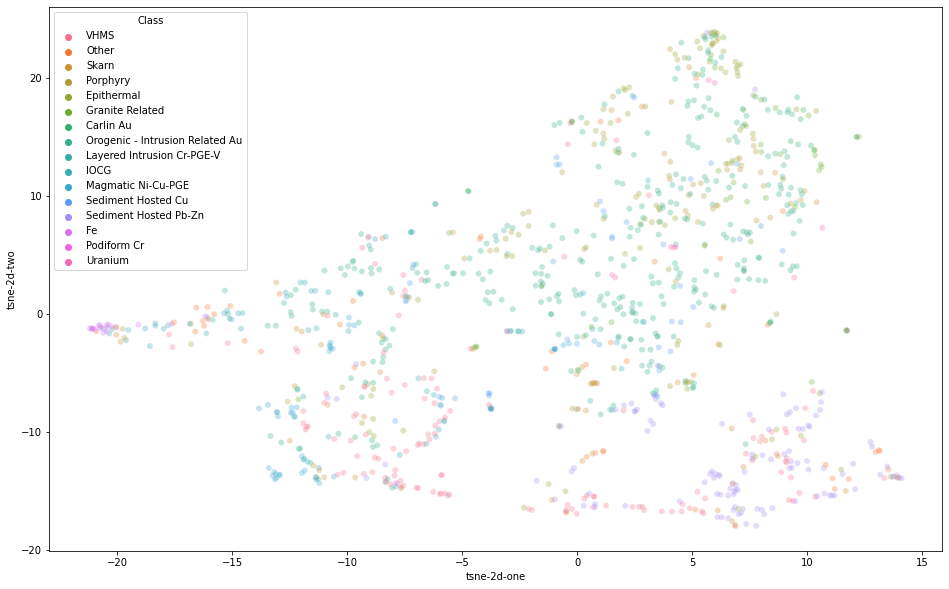

In [45]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",hue="Class",
    data=df,
    legend="full",
    alpha=0.3
)


In [46]:
df

,Au (FA),Pt,Pd,Au (AR),Bi,Te,Hg,Ag,Al,As,...,B,Hf,Si,Zr,Be,Ga,Ge,Class,tsne-2d-one,tsne-2d-two
0,0.438,0.002,0.002,0.362,10.60,0.02,0.39,91.50,2700,318,...,-20,0.4,34200,60,-1.0,11.0,1,VHMS,-0.421824,-16.205265
1,0.093,0.001,0.002,0.095,125.00,0.22,0.12,44.00,26300,75,...,-20,0.2,114000,20,-1.0,2.0,-1,VHMS,-6.330059,-5.478340
2,1.410,0.002,0.002,1.390,120.00,0.02,62.90,215.00,100,4820,...,-20,-0.2,71500,-10,-1.0,-1.0,2,VHMS,1.246218,-16.240959
3,0.096,0.003,0.005,0.086,0.72,0.80,0.03,2.50,37800,11,...,-20,2.0,244000,70,-1.0,-1.0,-1,VHMS,-0.559090,4.836117
4,2.900,0.003,0.005,3.940,0.34,0.06,4.01,162.00,19600,1010,...,-20,-0.2,142000,-10,-1.0,-1.0,2,VHMS,8.451999,-10.009324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,0.045,-0.001,-0.001,0.003,0.14,0.08,0.06,0.10,900,221,...,40,0.8,66100,70,0.3,0.8,1,Orogenic - Intrusion Related Au,3.429727,-6.495503
1135,0.083,-0.001,-0.001,0.078,0.08,0.14,0.08,0.10,52000,94,...,-20,2.2,362000,90,0.9,11.6,1,Orogenic - Intrusion Related Au,9.005909,13.773930
1136,0.041,0.004,0.004,0.034,0.08,0.96,0.06,0.15,22000,138,...,80,-0.2,191000,20,0.3,5.4,1,Orogenic - Intrusion Related Au,1.784316,-2.024517
1137,619.000,-0.001,-0.001,415.000,1.28,0.04,0.72,9.50,1400,589,...,60,-0.2,368000,-10,0.1,0.8,3,Orogenic - Intrusion Related Au,5.071771,18.089777


In [47]:
df=df.drop(columns=['tsne-2d-one', 'tsne-2d-two','Class'])

In [48]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.48745423 0.20943557 0.08448552]


In [50]:
df['Class']=list(data1["Class"])

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

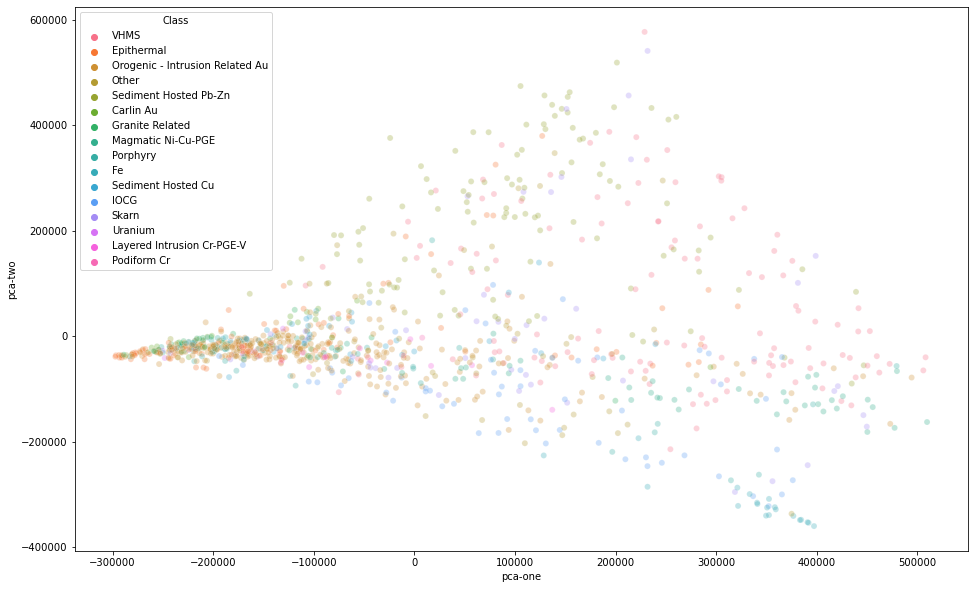

In [51]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",hue="Class",
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

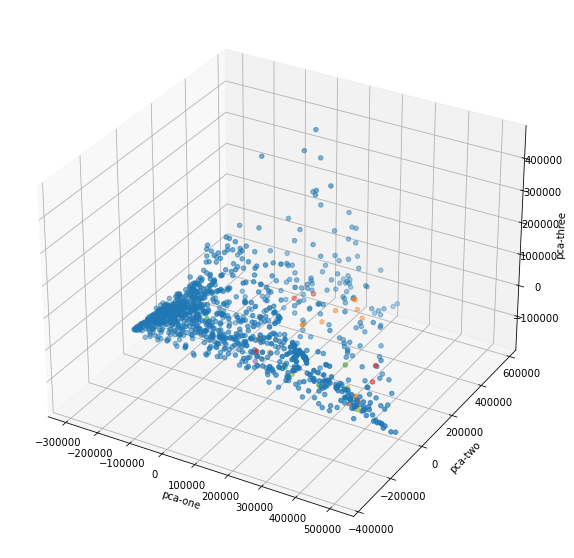

In [54]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["In"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()